In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [200]:
# Source of data - "https://www.kaggle.com/datasets/shwetabh123/mall-customers"

df = pd.read_csv('/content/drive/MyDrive/Internship/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [202]:
df.shape

(200, 5)

In [203]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [204]:
len(df[df.duplicated()])

0

In [205]:
df.drop(columns=['CustomerID'], inplace=True)

In [206]:
df.head(2)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [207]:
# Renaming columns

df.columns=df.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score', 'Genre': 'Gender'}).columns
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [208]:
# Converting gender to binary
df.Gender=np.where(df["Gender"]=="Male",0,1)
df.Gender

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [209]:
# Lets create a copy of the original dataframe and name the copy as df_scaled
df_scaled = df.copy()

In [210]:
# Standardize the data using standard scalar
ss = StandardScaler()

df_scaled.iloc[:,:] = ss.fit_transform(df_scaled.iloc[:,:])

In [211]:
df_scaled.head(2)

,Gender,Age,Annual Income,Spending Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704


In [212]:
cluster_range = range(1,20)
cluster_errors = []

for num_clusters in cluster_range:

    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_scaled)

    labels = clusters.labels_
    centroids = clusters.cluster_centers_

    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range,
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,800.000000
1,2,588.802677
2,3,484.825560
3,4,386.714786
4,5,325.682790
5,6,276.182916
6,7,235.377929
7,8,199.832259
8,9,174.235477
9,10,152.086763


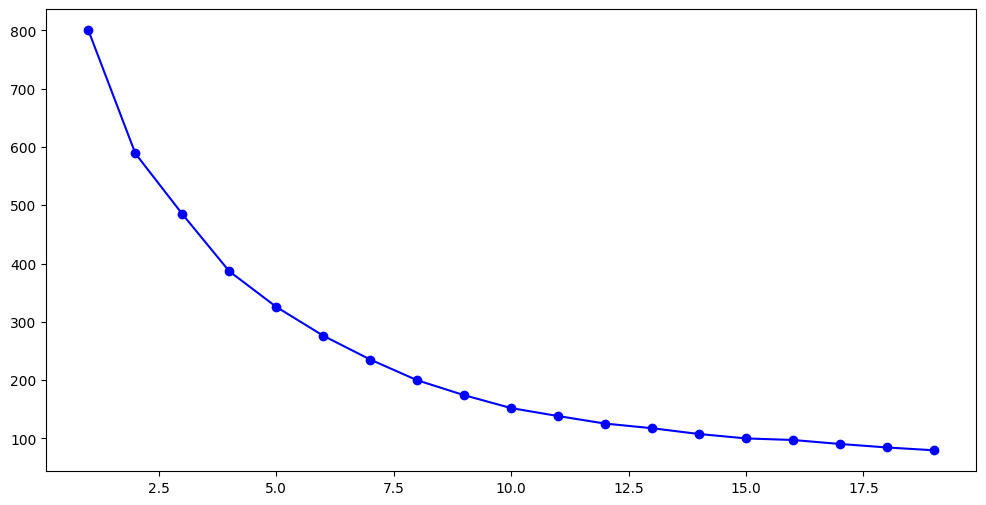

In [213]:
# Elbow plot

plt.figure(figsize=[12,6])
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [229]:
# Fit the KMeans clustering model using the obtained optimal K

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=15, random_state=27)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, n_init=15, random_state=27)

In [230]:
# Obtained labels from kmeans clustering

kmeans.labels_

array([3, 3, 4, 1, 4, 1, 4, 1, 0, 1, 0, 1, 4, 1, 0, 3, 4, 3, 0, 1, 0, 3,
       4, 3, 4, 3, 4, 3, 4, 1, 0, 1, 0, 3, 4, 1, 4, 1, 4, 1, 4, 3, 0, 1,
       4, 1, 4, 1, 1, 1, 4, 3, 1, 0, 4, 0, 4, 0, 1, 0, 0, 3, 4, 4, 0, 3,
       4, 4, 3, 1, 0, 4, 4, 4, 0, 3, 4, 3, 1, 4, 0, 3, 0, 4, 1, 0, 4, 1,
       1, 4, 4, 3, 0, 4, 1, 3, 4, 1, 0, 3, 1, 4, 0, 3, 0, 1, 4, 0, 0, 0,
       0, 1, 4, 3, 1, 1, 4, 4, 4, 4, 3, 4, 1, 3, 1, 1, 2, 3, 0, 3, 2, 3,
       1, 1, 2, 1, 2, 3, 2, 1, 4, 3, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 1,
       2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 2, 3, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 3], dtype=int32)

In [231]:
# Creating a new dataframe only for labels and converting it into categorical variables.

df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))

df_labels.head(5)

,Labels
0,3
1,3
2,4
3,1
4,4


In [232]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [233]:
# Joining the label dataframe with unscaled initial dataframe.(df)

df_kmeans = df.join(df_labels)

df_kmeans.head(2)

,Gender,Age,Annual Income,Spending Score,Labels
0,0,19,15,39,3
1,0,21,15,81,3


In [234]:
df_kmeans['Labels'].value_counts()

1    56
4    43
3    41
2    32
0    28
Name: Labels, dtype: int64

In [235]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_kmeans[['Annual Income', 'Spending Score']])

In [238]:
# Silhouette score

from sklearn.metrics import silhouette_score
kmeans_score = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_kmeans)
    labels = kmeans.predict(df_kmeans)
    print(i,silhouette_score(df_kmeans,labels))

2 0.2923108309227455
3 0.382782091781463
4 0.40402818343693525
5 0.43865018273897555
6 0.44979271911868696
7 0.4385686951586017
8 0.42533432098777996
9 0.384164760041361
10 0.3804510752485639
11 0.36836325416941584
12 0.35703665329845113
13 0.3501486728520382
14 0.3584020220283152
15 0.34330710902183087


Score is highest for 6

In [239]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
df_kmeans['Labels'] = kmeans.fit_predict(scaled_data)

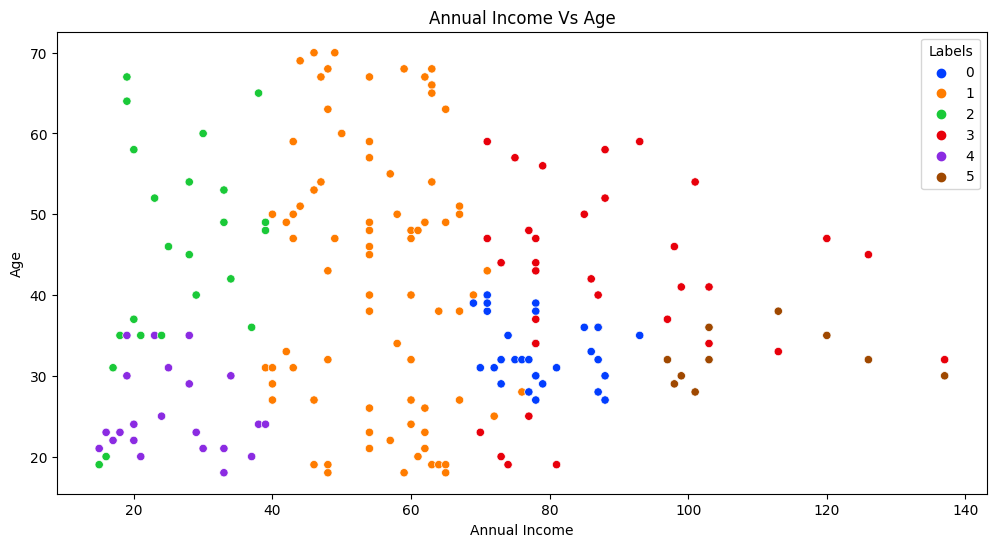

In [241]:
# Visualizing Kmeans clustered classes

plt.figure(figsize=[12,6])
plt.title('Annual Income Vs Age')
sns.scatterplot(x='Annual Income',y='Age',hue='Labels',data=df_kmeans,palette='bright')
plt.show()

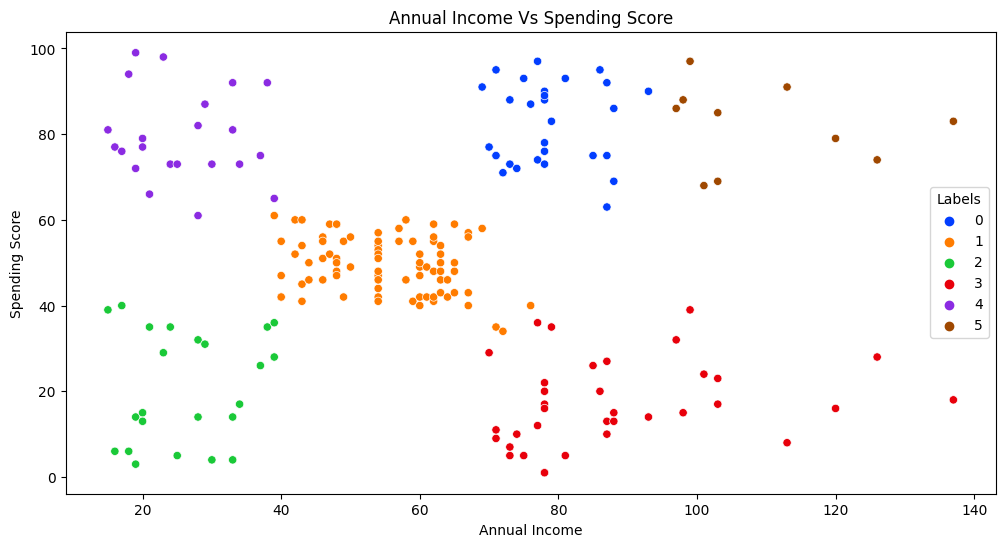

In [242]:
plt.figure(figsize=[12,6])
plt.title('Annual Income Vs Spending Score')
sns.scatterplot(x='Annual Income',y='Spending Score',hue='Labels',data=df_kmeans,palette='bright')
plt.show()

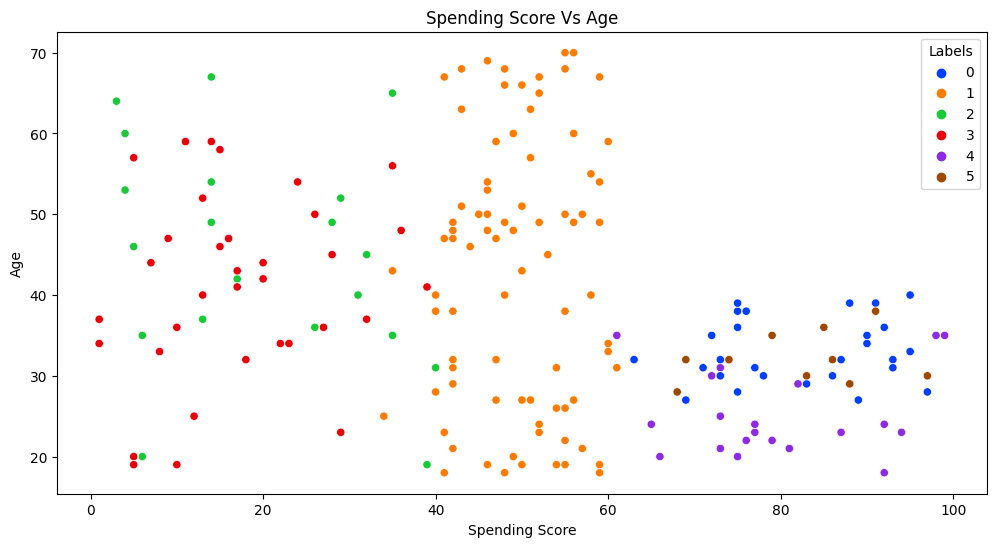

In [243]:
plt.figure(figsize=[12,6])
plt.title('Spending Score Vs Age')
sns.scatterplot(x='Spending Score',y='Age',hue='Labels',data=df_kmeans,palette='bright')
plt.show()

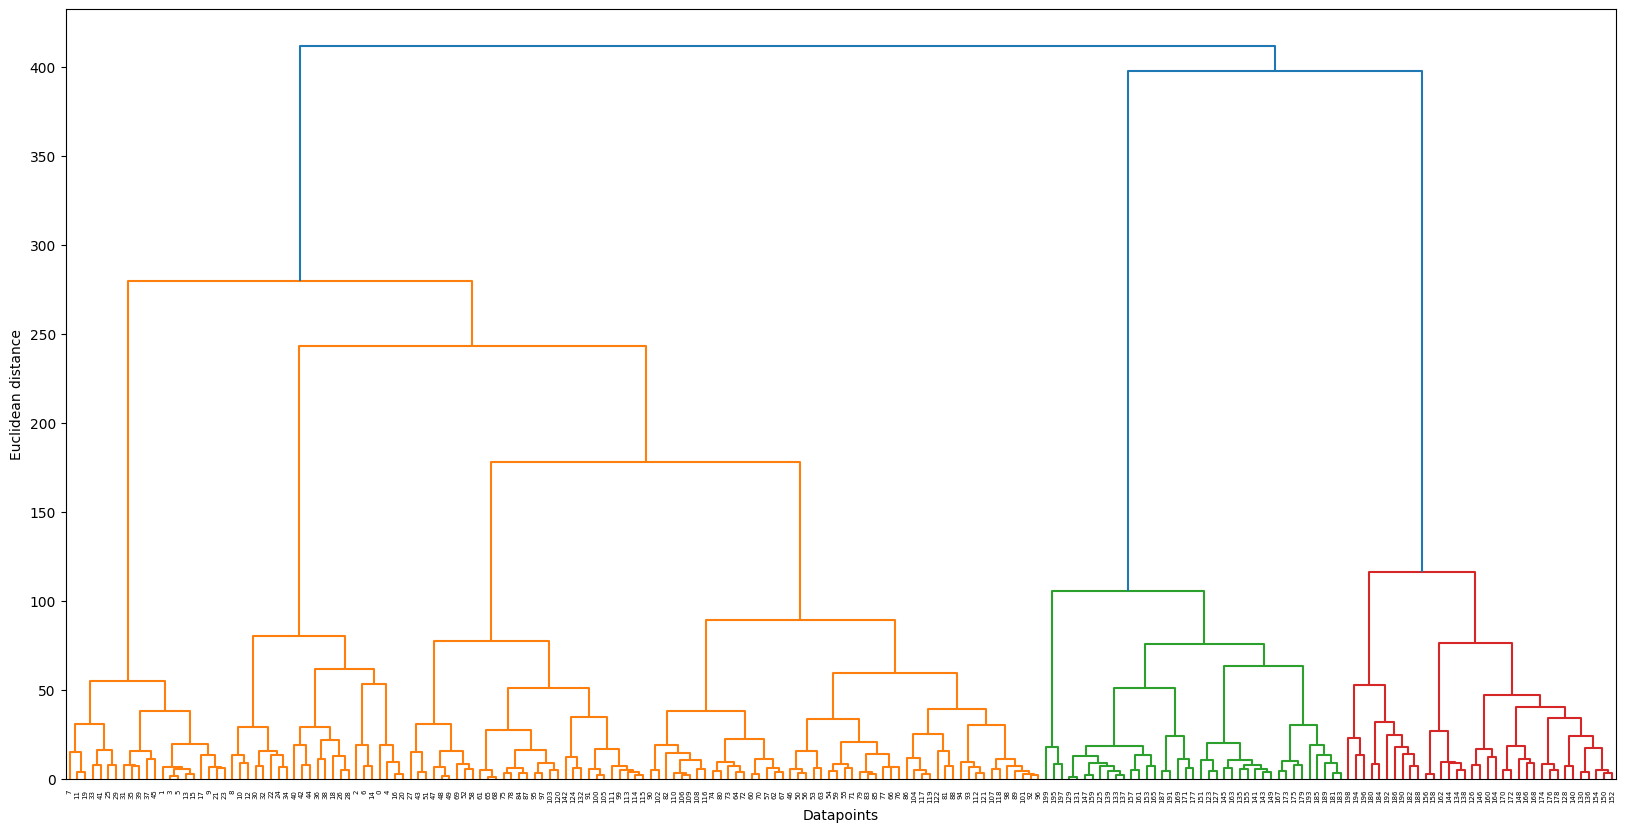

In [244]:
# Agglomerative clustering - Dendogram

plt.figure(figsize=[20,10])
merg = linkage(df_kmeans, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

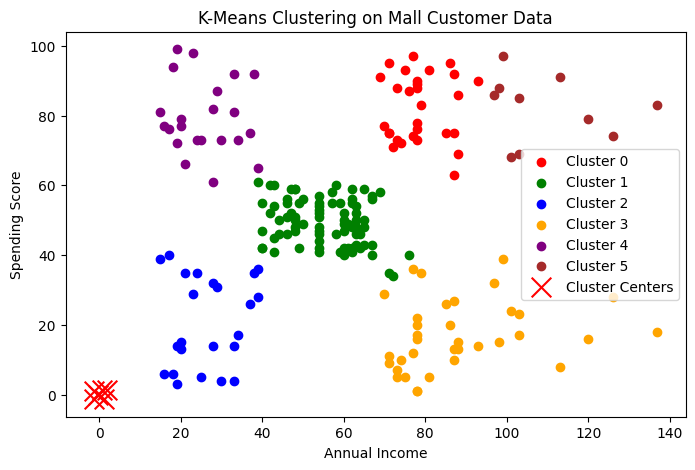

In [247]:
# Iterate through clusters and plot each cluster

plt.figure(figsize=(8, 5))
clr=["red","green","blue","orange","purple", "brown"]
for cluster_number in range(n_clusters):
    cluster_data = df_kmeans[df_kmeans['Labels'] == cluster_number]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'],c=clr[cluster_number],
                label=f'Cluster {cluster_number}')


# Plot cluster centers

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Cluster Centers')


# Label axes and title

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering on Mall Customer Data')
plt.legend()
plt.show()